In [26]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import morphology, io, color



In [27]:
brain_scan_path  = "./imgs/brain-scan.jpeg"
brain_scan = Image.open(brain_scan_path).convert("L")

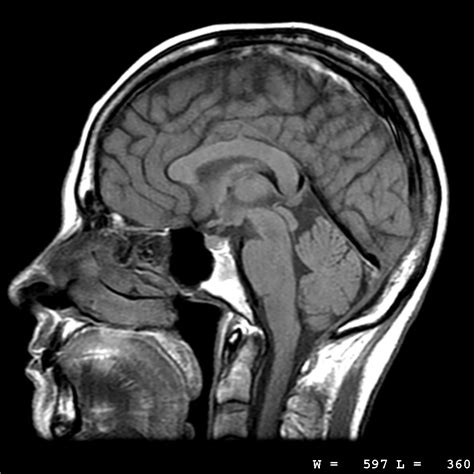

In [28]:
brain_scan

In [29]:
brain_scan_array = np.array(brain_scan)
print(brain_scan_array.max())
print(brain_scan_array.min())

255
0


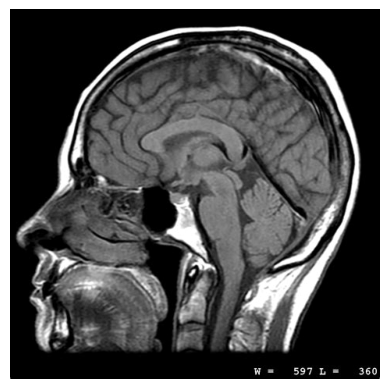

In [30]:
plt.imshow(brain_scan, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.show()


In [31]:
B = morphology.disk(5) 

In [32]:
dilated = morphology.dilation(brain_scan_array, B)

In [33]:
eroded = morphology.erosion(brain_scan_array, B)

In [34]:
gradient = dilated - eroded

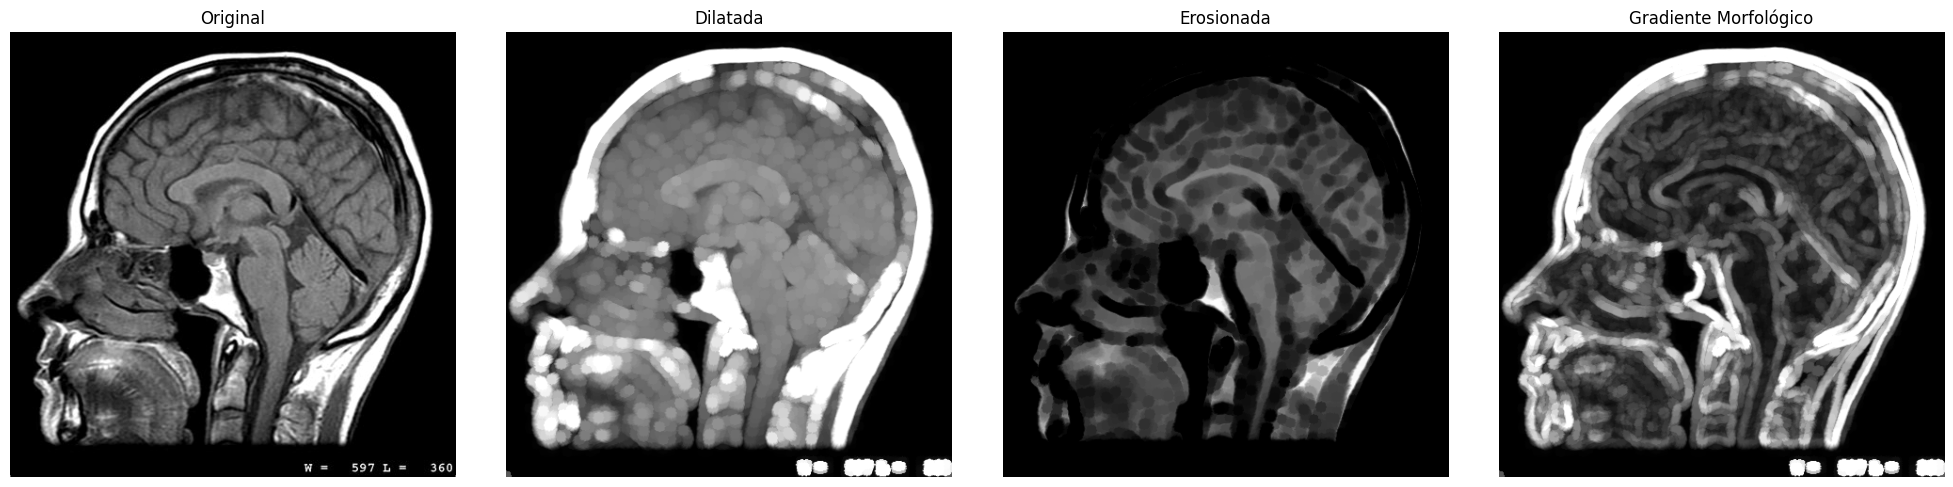

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(brain_scan_array, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[1].imshow(dilated, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Dilatada')
axes[2].imshow(eroded, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Erosionada')
axes[3].imshow(gradient, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('Gradiente Morfológico')

plt.tight_layout()
for ax in axes:
    ax.axis('off')
plt.show()

# Efecto sobre otras imágenes

In [41]:
def gradient_tests(image_path):
    image = Image.open(image_path).convert("L")
    image_array = np.array(image)
    vmacs = 1 if image_array.max()<=1 else 255

    B = morphology.disk(5) 
    dilated = morphology.dilation(image_array, B)
    eroded = morphology.erosion(image_array, B)
    gradient = dilated - eroded


    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(image_array, cmap='gray', vmin=0, vmax=vmacs)
    axes[0].set_title('Original')
    axes[1].imshow(dilated, cmap='gray', vmin=0, vmax=vmacs)
    axes[1].set_title('Dilatada')
    axes[2].imshow(eroded, cmap='gray', vmin=0, vmax=vmacs)
    axes[2].set_title('Erosionada')
    axes[3].imshow(gradient, cmap='gray', vmin=0, vmax=vmacs)
    axes[3].set_title('Gradiente Morfológico')

    plt.tight_layout()
    for ax in axes:
        ax.axis('off')
    plt.show()
        
    

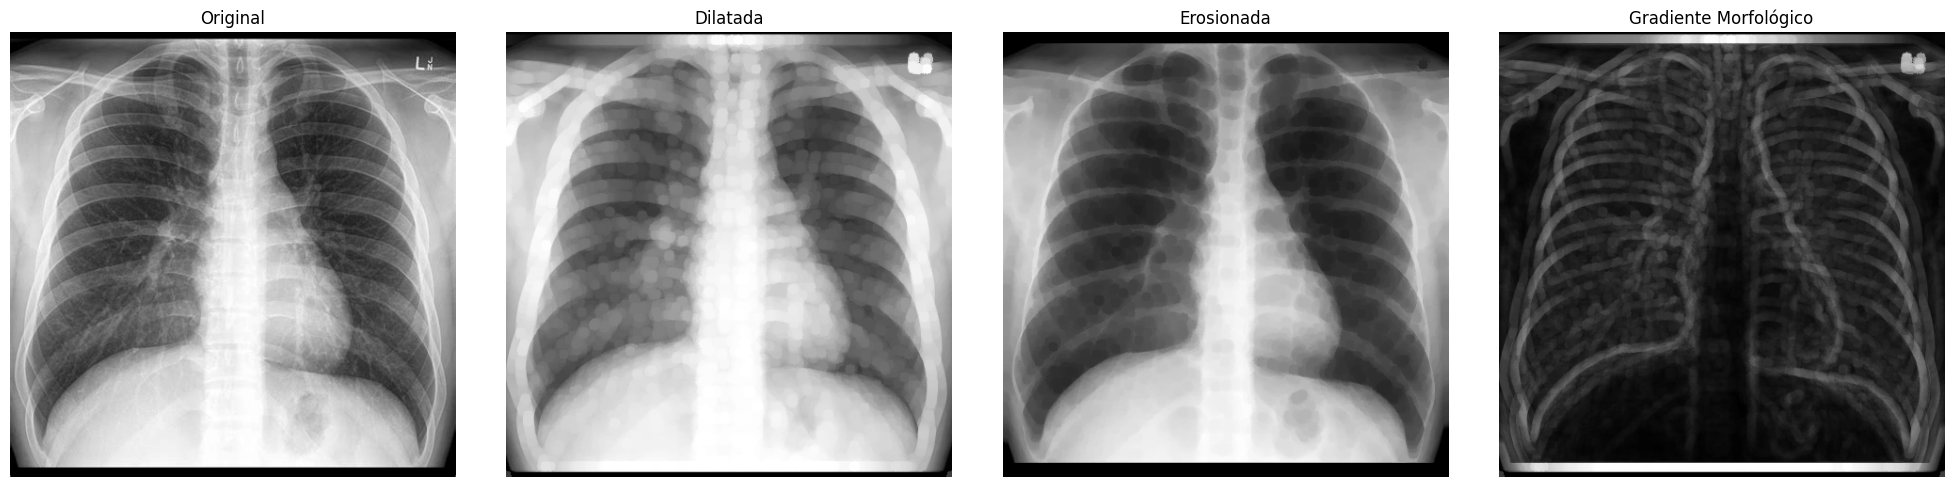

In [42]:
gradient_tests("./imgs/chestxray.jpeg")

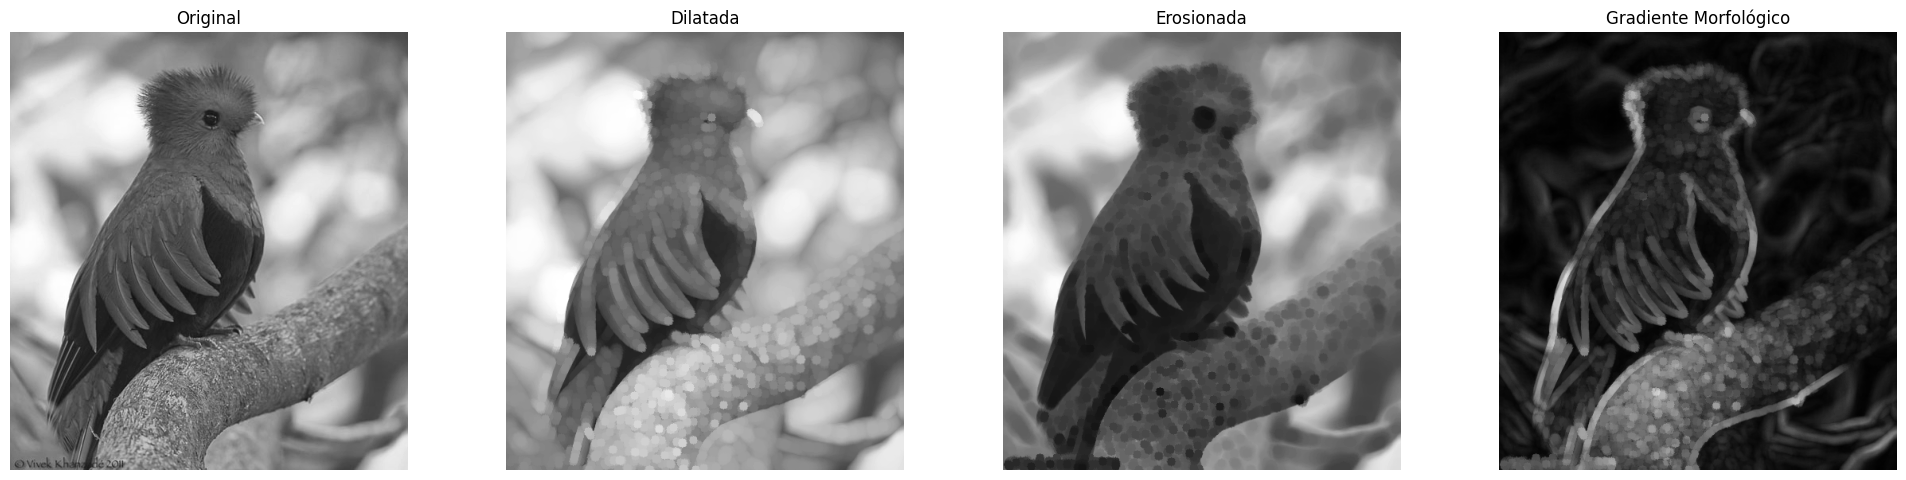

In [43]:
gradient_tests("./imgs/quetzalgris.png")

# Expllicación de resultados y del gradiente

El término de **gradiente** lo vemos venir desde clases de cálculo en el que se establece es un valor que está asociado al cambio en determinada parte de una función. 

En el procesamiento de imágenes no es tan diferente. Utilizamos el gradiente para identificar los cambios en determinadas partesd de la imagen, cambios que denotan bordes o transición en la imagen. Es decir que el gradiente morfológico podemos considerarle el que estima la intesidad de pixeles. 

Para alcanzar este resultado nos apoyamos de las operaciones morfologicas de dilatación y erosión. 

Dilatación (⊕): Expande las regiones claras de la imagen y conecta áreas cercanas, llenando pequeños huecos y alargando las fronteras de las figuras blancas sobre un fondo oscuro.

Erosión (⊖): Reduce las regiones claras y elimina objetos pequeños o protuberancias, efectivamente encogiendo las áreas blancas y aumentando las áreas oscuras.

El gradiente morfológico (∇(I) = (I ⊕ B) − (I ⊖ B)) entonces, resalta los contornos de los objetos en la imagen al restar la imagen erosionada de la dilatada. Esto tiene el efecto de preservar o resaltar los bordes y las transiciones, ya que estas áreas son donde hay mayores diferencias entre la dilatación y la erosión.